In [310]:
import pandas as pd
import pyviz
import hvplot.pandas
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import param, panel as pn

import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

# Using Data Science to Find an Apartment in Amsterdam

<img src='amsterdam-canal-houses.jpg'/>

<hr/>

## In this notebook we will:

**1. Analyse & Explore Amsterdam Apartment Data with Pandas**

**2. Use iPyWidgets to Make Data Exploration Easier & Powerful**

**3. Merge our apartment dataset with Yelp Fusion Data**

**3. Generate Interactive Visualizations Using PyViz**

**4. Deploy our own Dashboard Server**


## Analysing Amsterdam Apartment Data with Pandas

### Loading our Data

In [66]:
df_apartments = pd.read_pickle('data/AMS-Apartments.pkl')

In [67]:
df_apartments.columns

Index(['address', 'apartment_size', 'begin_date', 'category', 'created_at',
       'district1', 'id', 'latitude', 'longitude', 'name', 'normalized_price',
       'number_of_bedrooms', 'occupied_dates', 'city_code'],
      dtype='object')

## Exploring our Data with Pandas

### Let's find out which apartments:

* Are priced below EUR 1500
* Have an area greater than 50 square meters
* Have more than 2 kamers

### Priced Below EUR 1500

In [77]:
df_apartments[df_apartments.normalized_price < 1500]

,address,apartment_size,begin_date,category,created_at,district1,id,latitude,longitude,name,normalized_price,number_of_bedrooms,occupied_dates,city_code
0,Willem de Zwijgerlaan,50.0,2018-02-16,apartment,2018-02-15T07:14:46,amsterdam-west,1037654,52.374235,4.863561,2 rooms apartment in Willem de Zwijgerlaan,1450.0,2,[],amsterdam
1,Anton Constandsestraat,93.0,2018-02-16,apartment,2018-02-14T07:15:58,amsterdam-oost,1035398,52.346959,4.922161,4 rooms apartment in Anton Constandsestraat,1334.0,4,[],amsterdam
3,Pieter Postpad,103.0,2018-02-16,apartment,2018-01-07T22:54:22,amsterdam-nieuw-west,890896,52.381874,4.794895,3 rooms apartment in Pieter Postpad,870.0,3,[],amsterdam
5,Van Speijkstraat,60.0,2018-02-16,apartment,2017-11-22T03:08:58,amsterdam-west,692713,52.367498,4.860455,3 rooms apartment in Van Speijkstraat,1375.0,3,[],amsterdam
6,Henri Dunantstraat,93.0,2018-02-16,apartment,2017-10-21T07:50:07,amsterdam-nieuw-west,615559,52.348098,4.829354,3 rooms apartment in Henri Dunantstraat,1257.0,3,[],amsterdam
8,Spuistraat,40.0,2018-02-16,apartment,2017-10-21T08:18:53,amsterdam-centrum,617301,52.375270,4.891070,2 rooms apartment in Spuistraat,1375.0,2,[],amsterdam
10,Passeerdersstraat 1,35.0,2018-02-16,apartment,2017-12-09T08:03:00,amsterdam-centrum,799352,52.367916,4.882019,2 rooms apartment in Passeerdersstraat 1,1400.0,2,[],amsterdam
11,Maliebaan,83.0,2018-02-16,apartment,2018-01-17T07:04:47,amsterdam-oost,922103,52.347471,4.921965,3 rooms apartment in Maliebaan,1226.0,3,[],amsterdam
12,Nieuwezijds Voorburgwal,35.0,2018-02-16,apartment,2018-02-03T06:27:53,amsterdam-centrum,994350,52.371509,4.890172,2 rooms apartment in Nieuwezijds Voorburgwal,1250.0,2,[],amsterdam
15,Kaasjeskruidstraat,65.0,2018-02-16,apartment,2017-10-21T07:30:30,amsterdam-noord,614424,52.398775,4.905580,3 rooms apartment in Kaasjeskruidstraat,1450.0,3,[],amsterdam


In [80]:
df_apartments[df_apartments.normalized_price < 1500].shape

(167, 14)

### Area Greater than 50 Square Meters

In [78]:
df_apartments[df_apartments.apartment_size > 50]

,address,apartment_size,begin_date,category,created_at,district1,id,latitude,longitude,name,normalized_price,number_of_bedrooms,occupied_dates,city_code
1,Anton Constandsestraat,93.0,2018-02-16,apartment,2018-02-14T07:15:58,amsterdam-oost,1035398,52.346959,4.922161,4 rooms apartment in Anton Constandsestraat,1334.0,4,[],amsterdam
2,Leusdenhof,92.0,2018-02-16,apartment,2018-01-17T07:02:16,amsterdam-zuidoost,922046,52.308798,4.978442,4 rooms apartment in Leusdenhof,1550.0,4,[],amsterdam
3,Pieter Postpad,103.0,2018-02-16,apartment,2018-01-07T22:54:22,amsterdam-nieuw-west,890896,52.381874,4.794895,3 rooms apartment in Pieter Postpad,870.0,3,[],amsterdam
4,Oudezijds Achterburgwal,55.0,2018-02-16,apartment,2018-02-04T06:44:58,amsterdam-centrum,1000917,52.372062,4.897713,3 rooms apartment in Oudezijds Achterburgwal,1500.0,3,[],amsterdam
5,Van Speijkstraat,60.0,2018-02-16,apartment,2017-11-22T03:08:58,amsterdam-west,692713,52.367498,4.860455,3 rooms apartment in Van Speijkstraat,1375.0,3,[],amsterdam
6,Henri Dunantstraat,93.0,2018-02-16,apartment,2017-10-21T07:50:07,amsterdam-nieuw-west,615559,52.348098,4.829354,3 rooms apartment in Henri Dunantstraat,1257.0,3,[],amsterdam
7,Avercampstraat,95.0,2018-02-16,apartment,2017-12-07T09:01:20,amsterdam-zuid,791147,52.349978,4.893084,5 rooms apartment in Avercampstraat,2000.0,5,[],amsterdam
11,Maliebaan,83.0,2018-02-16,apartment,2018-01-17T07:04:47,amsterdam-oost,922103,52.347471,4.921965,3 rooms apartment in Maliebaan,1226.0,3,[],amsterdam
14,Nieuwezijds Armsteeg,70.0,2018-02-16,apartment,2017-11-30T09:02:05,amsterdam-centrum,708520,52.377125,4.896189,2 rooms apartment in Nieuwezijds Armsteeg,1500.0,2,[],amsterdam
15,Kaasjeskruidstraat,65.0,2018-02-16,apartment,2017-10-21T07:30:30,amsterdam-noord,614424,52.398775,4.905580,3 rooms apartment in Kaasjeskruidstraat,1450.0,3,[],amsterdam


In [79]:
df_apartments[df_apartments.apartment_size > 50].shape

(1108, 14)

### More than Two Kamers

In [81]:
df_apartments[df_apartments.number_of_bedrooms > 2]

,address,apartment_size,begin_date,category,created_at,district1,id,latitude,longitude,name,normalized_price,number_of_bedrooms,occupied_dates,city_code
1,Anton Constandsestraat,93.0,2018-02-16,apartment,2018-02-14T07:15:58,amsterdam-oost,1035398,52.346959,4.922161,4 rooms apartment in Anton Constandsestraat,1334.0,4,[],amsterdam
2,Leusdenhof,92.0,2018-02-16,apartment,2018-01-17T07:02:16,amsterdam-zuidoost,922046,52.308798,4.978442,4 rooms apartment in Leusdenhof,1550.0,4,[],amsterdam
3,Pieter Postpad,103.0,2018-02-16,apartment,2018-01-07T22:54:22,amsterdam-nieuw-west,890896,52.381874,4.794895,3 rooms apartment in Pieter Postpad,870.0,3,[],amsterdam
4,Oudezijds Achterburgwal,55.0,2018-02-16,apartment,2018-02-04T06:44:58,amsterdam-centrum,1000917,52.372062,4.897713,3 rooms apartment in Oudezijds Achterburgwal,1500.0,3,[],amsterdam
5,Van Speijkstraat,60.0,2018-02-16,apartment,2017-11-22T03:08:58,amsterdam-west,692713,52.367498,4.860455,3 rooms apartment in Van Speijkstraat,1375.0,3,[],amsterdam
6,Henri Dunantstraat,93.0,2018-02-16,apartment,2017-10-21T07:50:07,amsterdam-nieuw-west,615559,52.348098,4.829354,3 rooms apartment in Henri Dunantstraat,1257.0,3,[],amsterdam
7,Avercampstraat,95.0,2018-02-16,apartment,2017-12-07T09:01:20,amsterdam-zuid,791147,52.349978,4.893084,5 rooms apartment in Avercampstraat,2000.0,5,[],amsterdam
11,Maliebaan,83.0,2018-02-16,apartment,2018-01-17T07:04:47,amsterdam-oost,922103,52.347471,4.921965,3 rooms apartment in Maliebaan,1226.0,3,[],amsterdam
15,Kaasjeskruidstraat,65.0,2018-02-16,apartment,2017-10-21T07:30:30,amsterdam-noord,614424,52.398775,4.905580,3 rooms apartment in Kaasjeskruidstraat,1450.0,3,[],amsterdam
16,Bennebroekstraat 32,90.0,2018-02-16,apartment,2018-01-01T06:15:53,amsterdam-zuid,858970,52.352950,4.847256,4 rooms apartment in Bennebroekstraat 32,1695.0,4,[],amsterdam


In [82]:
df_apartments[df_apartments.number_of_bedrooms > 2].shape

(790, 14)

## Exploring our Data Interactively with iPyWidgets

Wouldn't it be nice if we wanted to browse apartments based on different price levels without having to write additional code?

In [115]:
@interact
def show_apartments_pricier_than(column='normalized_price', x=1500):
    print('There are {} apartments for which price is lower than EUR {}'.format(df_apartments.loc[df[column] < x].shape[0], x))
    return df_apartments.loc[df[column] < x]

interactive(children=(Text(value='normalized_price', description='column'), IntSlider(value=1500, description=…

We can do the same for the area:

In [114]:
@interact
def show_apartments_larger_than(column='apartment_size', x=50):
    print('There are {} apartments that are larger than {} square meters'.format(df_apartments.loc[df[column] > x].shape[0], x))
    return df_apartments.loc[df[column] > x]

interactive(children=(Text(value='apartment_size', description='column'), IntSlider(value=50, description='x',…

And for number of kamers:

In [113]:
@interact
def show_apartments_larger_than(column='number_of_bedrooms', x=4):
    print('There are {} apartments with less than {} bedrooms'.format(df_apartments.loc[df[column] < x].shape[0], x))
    return df_apartments.loc[df[column] < x]

interactive(children=(Text(value='number_of_bedrooms', description='column'), IntSlider(value=4, description='…

## Combining iPyWidgets with Visualization Libraries

We can also combine iPyWidgets with visualization libraries in order to generate different plots for different variables and values on the fly.

In [275]:
@interact
def scatter_plot(x=list(df_apartments.select_dtypes('number').columns), 
                 y=list(df_apartments.select_dtypes('number').columns)):
    
    plt.scatter(x=x, y=y, data=df_apartments)

interactive(children=(Dropdown(description='x', options=('apartment_size', 'id', 'latitude', 'longitude', 'nor…

## Visualizing Apartments in a Map

In [195]:
def plot_apartments_map(df_ap):
    
    import folium

    m = folium.Map([52.3733752,4.8864105], zoom_start=12, tiles='Stamen Toner')

    for i,row in df_ap.iterrows():

        red = int((row.price_per_meter / df_ap[df_ap.normalized_price < 2000].price_per_meter.max()) * 255)
        green = 255 - red
        html = '#%02x%02x%02x' % (red, green, 0) #convert rgb to html
        house_string = '{} - {}m2'.format(row.normalized_price, row.apartment_size)

        marker = folium.CircleMarker(location=[row.latitude,row.longitude], radius=(row.apartment_size/5), color=html, fill=html, fill_opacity='0.3', popup=house_string)

        m.add_child(marker)
        
    return m

In [196]:
# Interact with specification of arguments
@interact_manual
def plot_apartments(column='normalized_price', 
                            x=1500):
    return plot_apartments_map(df_apartments.loc[df_apartments[column] < x])

interactive(children=(Text(value='normalized_price', description='column'), IntSlider(value=1500, description=…

## Visualizing Points-of-Interest (POIs) in a Map

Let's load a sample of POIs in Amsterdam that were obtained from the **Yelp Fusion API**.

In [265]:
df_pois = pd.read_pickle('data/AMS-Points-of-Interest.pkl')

In [281]:
df_pois.name.astype(str)

0                                     Stichting CREA
1                          Animo Academia de Español
2                            Basisschool de Achthoek
3                               UvA Oudemanhuispoort
4                                       Calandlyceum
5                               Hervormd Lyceum Zuid
6                 Amsterdam Fashion Institute - AMFI
7                                7e Montessorischool
8                      Schrijversvakschool Amsterdam
9                   1e Montessorischool De Wielewaal
10                              The Homework Company
11       Amsterdams Natuur & Milieu Educatie Centrum
12                       Montessori Lyceum Amsterdam
13    De Schijf - Dependance Basisschool de Achthoek
14                                Ignatius Gymnasium
15             Stichting Volksuniversiteit Amsterdam
16                                EF Education First
17                                     R.F.R. Düster
18         International Institute of Social H

In [305]:
df_pois.loc[2,'name']

'Basisschool de Achthoek'

In [295]:
df_pois.to_pickle('data/AMS-Points-of-Interest.pkl')

In [306]:
def plot_pois_map(df_pois):
    
    import folium

    m = folium.Map([52.3733752,4.8864105], zoom_start=13, tiles='Stamen Toner')

    for i,row in df_pois.iterrows():

        latitude = row.coordinates['latitude']
        longitude = row.coordinates['longitude']
        text = df_pois.loc[i,'name']
        marker = folium.Marker(location=[latitude,longitude], popup=text)

        m.add_child(marker)
        
    return m

In [307]:
# Interact with specification of arguments
@interact_manual
def plot_pois(column=['category'], 
                            x=(df_pois.category.unique())):
    return plot_pois_map(df_pois.loc[df_pois['category'] == x])

interactive(children=(Dropdown(description='column', options=('category',), value='category'), Dropdown(descri…

# Generating Interactive Visualizations

Let's move on and generate some cool interactive visualizations using the libraries from the PyViz package.

First, let's generate one using the good and old **matplotlib** for comparison purposes.

## Matplotlib

In [268]:
by_year = df_apartments[["created_at","normalized_price"]].groupby("created_at").aggregate(np.mean)

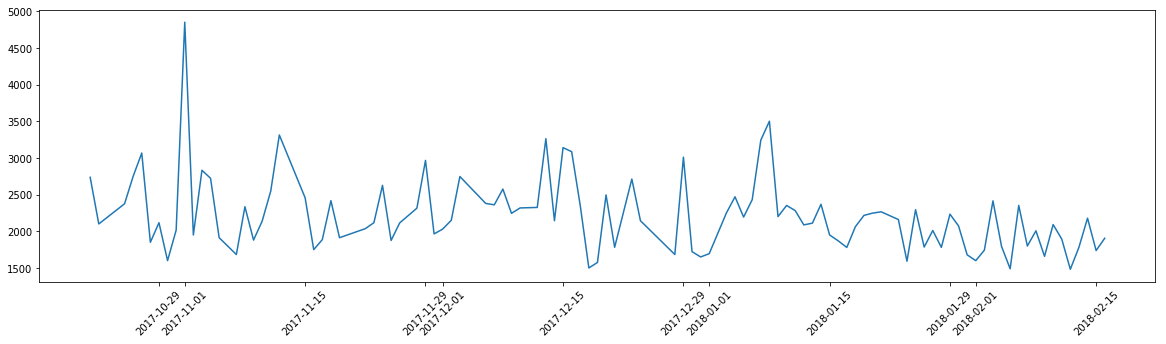

In [269]:
import numpy as np

plt.figure(figsize=(20,5))

plt.plot(by_year)

plt.xticks(rotation=45)

plt.show()

## HoloViews

Now let's see how to generate the same plot with HoloViews, which is part of PyViz and uses Bokeh on the backend.

In [139]:
import hvplot.pandas

by_year.hvplot()

:Curve   [created_at]   (normalized_price)

We are able to zoom and pan into our plot, which allows us more flexibility.

## Adding Annotations

HoloViews also makes it easier to add annotations to our plots (which are usually a pain to do with matplotlib)

In [270]:
import holoviews as hv
import datetime

vline = hv.VLine(datetime.datetime(2017,11,1)).opts(color='black')

m = by_year.hvplot() * vline * \
    hv.Text(datetime.datetime(2017,11,1), 3500, " November 2017", halign='left')
m

:Overlay
   .Curve.I :Curve   [created_at]   (normalized_price)
   .VLine.I :VLine   [x,y]
   .Text.I  :Text   [x,y]

## Individual Analysis per District

We can also aggregate our data per district and show how the number of listings has evolved from late 2017 to early 2018.

In [274]:
price_agg = df_apartments.groupby(['created_at', 'district1'])['normalized_price'].count()
by_state = price_agg.hvplot('created_at', groupby='district1', width=500, dynamic=False, title='apartment_listings')

by_state * vline

:HoloMap   [district1]
   :Overlay
      .Curve.Normalized_price :Curve   [created_at]   (normalized_price)
      .VLine.I                :VLine   [x,y]

## Generating Bar Plots per Month 

Now let's generate multiple bar plots aggregating by district and also by month.

In [273]:
districts = ['amsterdam-west', 'amsterdam-centrum', 'amsterdam-oost', 'amsterdam-noord', 'amsterdam_zuid']

df_apartments['year_month'] = df_apartments['created_at'].map(lambda x: 100*pd.to_datetime(x).year + pd.to_datetime(x).month)

price_agg_month = df_apartments.groupby(['year_month', 'district1'])['normalized_price'].mean()

price_agg_month.loc[:, districts].hvplot.bar('year_month', by='district1', rot=90, title='apartment listings')

:Bars   [year_month,district1]   (normalized_price)

In [362]:
class Gapminder(param.Parameterized):   
    
    year_month = param.ObjectSelector(default=201710, objects=list(np.sort(df_apartments.year_month.unique())))
    show_legend = param.Boolean(default=True)
    
    title = 'Apartment Size vs. Normalized Price'
    xlabel = 'Apartment Size'
    ylabel = 'Normalized Price'
    ylim = (1000, 7000)
    
    def get_data(self):
        df = df_apartments[(df_apartments.year_month==self.year_month)].copy()
        df['size'] = np.power(df.price_per_meter,1.2)
        return df

    def hvplot_view(self):
        data  = self.get_data()
        title = "hvPlot/Bokeh: "

        plot  = data.hvplot.scatter('apartment_size', 'normalized_price', by='district1', s='size',
                  logx=True, title=title, width=600, height=400, legend=self.show_legend, size=20)
        plot  = plot.options(legend_position='bottom_right', xticks=[500, 1000, 2000, 5000, 10000])
        plot  = plot.redim.label(gdpPercap=self.xlabel, lifeExp=self.ylabel)
        plot  = plot.redim.range(lifeExp=self.ylim, gdpPercap=(200, 12000))
        
        return plot
    
gm = Gapminder(name='')

In [363]:
pn.Column(gm.param,
          pn.Row(gm.hvplot_view))

Column
    [0] WidgetBox(width=300)
        [0] StaticText(value='<b></b>')
        [1] Checkbox(name='Show legend', value=True)
        [2] DiscreteSlider(formatter='%d', name='Year month', options=OrderedDict([('201710', ...]), value=201710)
    [1] Row
        [0] ParamMethod(method)

# Wrapping Up: Creating our own Dashboard Server with Bokeh

In [364]:
logo  = """<a href="http://panel.pyviz.org">
           <img src="https://panel.pyviz.org/_static/logo_stacked.png" 
            width=150 height=127 align="left" margin=20px>"""
title = pn.Pane('<h2>Plotting library comparison</h2>', width=450)

desc = pn.Pane("""
    The <a href="http://panel.pyviz.org">Panel</a> library from <a href="http://pyviz.org">PyViz</a> 
    lets you make widget-controlled apps and dashboards from a wide variety of 
    plotting libraries and data types. Here you can try out five different plotting libraries
    controlled by a couple of widgets, for Hans Rosling's 
    <a href="https://demo.bokehplots.com/apps/gapminder">gapminder</a> example.""", width=450)

pn.Row(pn.Column(logo, title, desc, pn.Spacer(height=25), gm.param),
       pn.Column(pn.Row(gm.hvplot_view))).servable();